## 数学软件第四次作业

本次作业旨在利用`sympy`库进行符号计算，完成一些数学问题的求解。以下是作业的具体内容，大家可以在不改变已有代码块序关系的情况下随意增添代码块，以便于完成作业。

在`ipynb`中数学结果的输出请用`display`函数

### 1. 积分运算 (15分)

利用`sympy`库计算如下积分：

1、$\int_{-\infty}^{\infty}e^{-x^2} \mathrm{d}x$

2、$\int_{0}^{\frac{\pi}{2}}(\cos x)^{10} \mathrm{d}x$

3、$\int_{0}^{\infty} \frac{1}{x^2+1} \mathrm{d}x$

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量
x = sp.symbols('x')

# 1
integral1 = sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))
print("第一个积分结果:")
display(integral1)

# 2
integral2 = sp.integrate(sp.cos(x)**10, (x, 0, sp.pi/2))
print("第二个积分结果:")
display(integral2)

# 3
integral3 = sp.integrate(1/(x**2 + 1), (x, 0, sp.oo))
print("第三个积分结果:")
display(integral3)


第一个积分结果:


sqrt(pi)

第二个积分结果:


63*pi/512

第三个积分结果:


pi/2

### 2. 表达式化简 （15分）

利用`sympy`库化简如下的表达式：

1、$\frac{\sin ^4(x)-2 \sin ^2(x) \cos ^2(x)+\cos ^4(x)}{\cos (2 x)}$

2、$\frac{x^3 + x^2 - x - 1}{x^2 + 2x + 1}$

3、$\Gamma(x) \Gamma(1-x)$, 这里 $\Gamma(x) = \int_0^{\infty} t^{x-1} e^{-t} \mathrm{d}t$ 是伽马函数

In [ ]:
# 定义符号变量
x = sp.symbols('x')

# 1
expr1 = (sp.sin(x)**4 - 2*sp.sin(x)**2*sp.cos(x)**2 + sp.cos(x)**4)/sp.cos(2*x)
simplified_expr1 = sp.simplify(expr1)
print("第一个表达式化简结果:")
display(simplified_expr1)

# 2
expr2 = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
simplified_expr2 = sp.simplify(expr2)
print("第二个表达式化简结果:")
display(simplified_expr2)

# 3
# 使用sympy的gamma函数
expr3 = sp.gamma(x) * sp.gamma(1-x)
simplified_expr3 = sp.simplify(expr3)
print("第三个表达式化简结果:")
display(simplified_expr3)

第一个表达式化简结果:


cos(2*x)

第二个表达式化简结果:


x - 1

第三个表达式化简结果:


pi/sin(pi*x)

### 3. 傅里叶系数计算 （50分）

#### 基础知识
由傅里叶级数知识我们可以知道，在$[-\pi,\pi]$上的函数$f(x)$可以定义如下的傅里叶级数：
$$
S(f)(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos(nx) + b_n \sin(nx) \right), S_N(f)(x) = \frac{a_0}{2} + \sum_{n=1}^{N} \left( a_n \cos(nx) + b_n \sin(nx) \right).
$$
其中各项系数的计算公式为：
$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \mathrm{d}x, \quad a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \mathrm{d}x, \quad b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \mathrm{d}x.
$$

$S_N(f)$ 是否收敛于$f(x)$ 这个问题比较复杂，这里不赘述，但是有几个结论我们可以给出：
1. 如果$f(x) \in C^2$, 则$S_N(f)(x)$一致收敛于$f(x)$
2. 存在连续的$f(x)$，它的傅里叶级数不是逐点收敛于$f(x)$，进一步分析可以证明，满足这种性质的函数在$C([-\pi,\pi])$中是稠密的。

以上 $C^p(\Omega)$ 表示在$\Omega$上具有$p$阶连续导数的函数，$C(\Omega)$表示在$\Omega$上连续的函数，并定义 $C^{-1}(\Omega)$ 为在 $\Omega$ 上不连续的函数。

定义以下评价函数(以下积分可用等距节点近似计算)：
$$
d(f) = \left(\int_{-\pi}^{\pi} |f(x)|^2 \mathrm{d}x \right)^{\frac{1}{2}}. 
$$

#### 任务
1. 计算函数
$$
\begin{cases}
f(x) = -1, & x \in [-\pi,0) \\ f(x) = 1, & x \in [0,\pi]
\end{cases}
$$
在$[-\pi,\pi]$上的傅里叶级数展开式，计算 $a_n, b_n$ 的值，并分别画出前 $n=5,10,20$ 项的傅里叶级数图像（$f(x)$ 也要画，可以画在一张图里），并计算 $d(f-S_5(f))$，$d(f-S_{10}(f))$，$d(f-S_{20}(f))$ 的值。

2. 计算函数
$$
f(x) = \frac{|x|}{\pi}, \quad x \in [-\pi,\pi]
$$
在$[-\pi,\pi]$上的傅里叶级数展开式，计算 $a_n, b_n$ 的值，并分别画出前 $n=5,10,20$ 项的傅里叶级数图像（$f(x)$ 也要画，可以画在一张图里），并计算 $d(f-S_5(f))$，$d(f-S_{10}(f))$，$d(f-S_{20}(f))$ 的值。

3. 计算函数
$$
f(x) = \frac{x^2 |x|}{\pi^3}, \quad x \in [-\pi,\pi]
$$
在$[-\pi,\pi]$上的傅里叶级数展开式，计算 $a_n, b_n$ 的值，并分别画出前 $n=5,10,20$ 项的傅里叶级数图像（$f(x)$ 也要画，可以画在一张图里），并计算 $d(f-S_5(f))$，$d(f-S_{10}(f))$，$d(f-S_{20}(f))$ 的值。


Function 1 Fourier Coefficients
a0 = 0.0
a_n = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ...
b_n = [1.2732395447351628, 0.0, 0.4244131815783876, 0.0, 0.25464790894703254, 0.0, 0.18189136353359467, 0.0, 0.14147106052612918, 0.0] ...
d(f-S_5(f)) = 0.6485751630361961
d(f-S_10(f)) = 0.5038378529736245
d(f-S_20(f)) = 0.3567942896007178


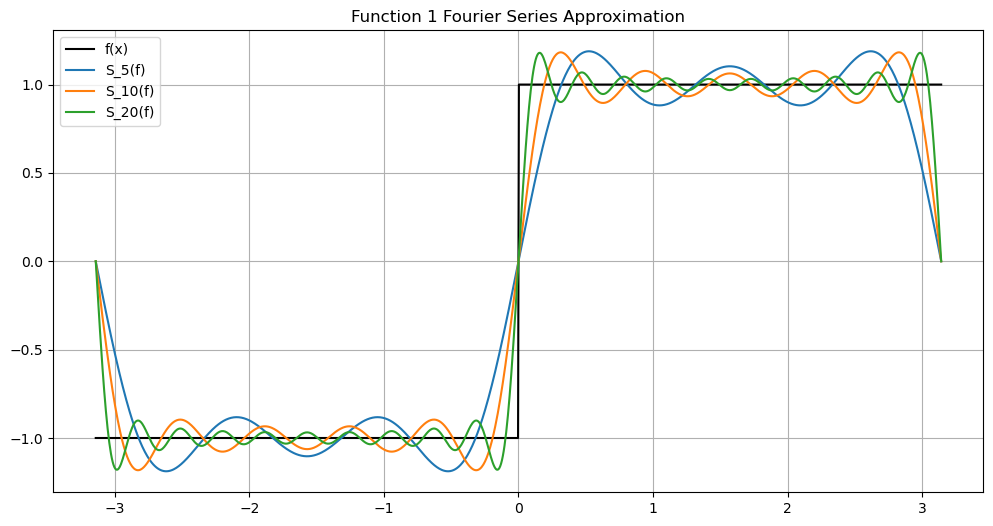


Function 2 Fourier Coefficients
a0 = 1.0
a_n = [-0.4052847345693511, 0.0, -0.04503163717437234, 0.0, -0.016211389382774045, 0.0, -0.008271117032027573, 0.0, -0.0050035152415969265, 0.0] ...
b_n = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ...
d(f-S_5(f)) = 0.019441763309460392
d(f-S_10(f)) = 0.009186040100249416
d(f-S_20(f)) = 0.0032739064995227374


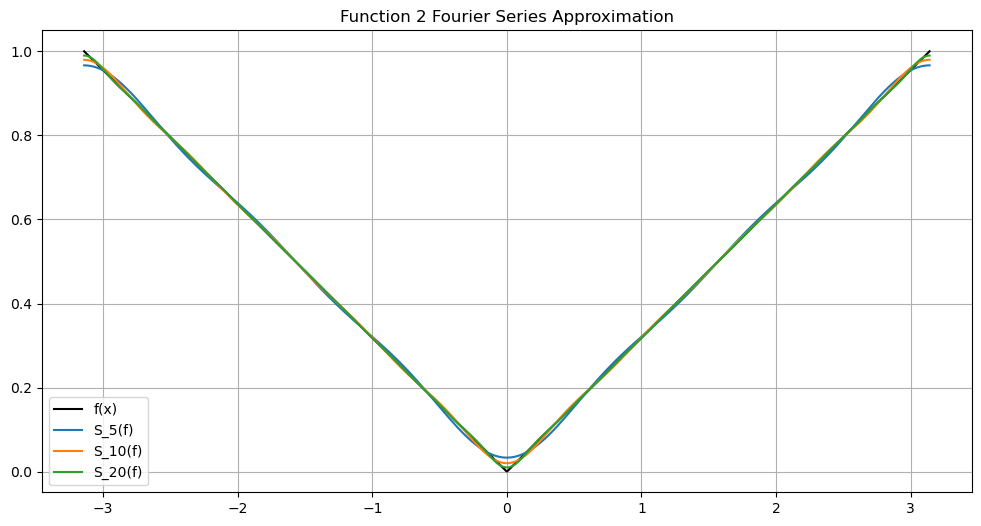


Function 3 Fourier Coefficients
a0 = 0.5
a_n = [-0.3615435277416026, 0.15198177546350666, -0.06450568324165204, 0.037995443865876666, -0.02392287035558119, 0.01688686394038963, -0.012304058482605115, 0.009498860966469166, -0.007467720115236051, 0.006079271018540266] ...
b_n = [2.624170354518394e-141, 2.624170354518394e-141, 2.624170354518394e-141, 1.312085177259197e-141, 1.312085177259197e-141, 1.312085177259197e-141, 1.312085177259197e-141, 6.560425886295985e-142, 6.560425886295985e-142, 6.560425886295985e-142] ...
d(f-S_5(f)) = 0.047744642913702895
d(f-S_10(f)) = 0.018238665370073643
d(f-S_20(f)) = 0.00672411420612987


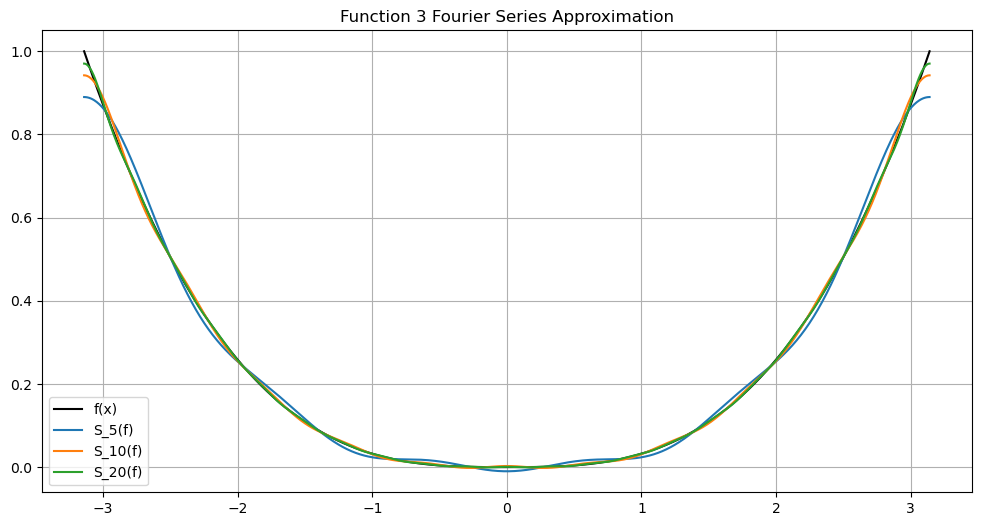

In [7]:
# 定义符号变量
x = sp.symbols('x')
n = sp.symbols('n', integer=True, positive=True)

# 辅助函数：计算傅里叶系数
def compute_fourier_coeffs(f_expr, N):
    a0 = (1/sp.pi) * sp.integrate(f_expr, (x, -sp.pi, sp.pi))
    
    a_coeffs = []
    b_coeffs = []
    
    for i in range(1, N+1):
        ai = (1/sp.pi) * sp.integrate(f_expr * sp.cos(i*x), (x, -sp.pi, sp.pi))
        bi = (1/sp.pi) * sp.integrate(f_expr * sp.sin(i*x), (x, -sp.pi, sp.pi))
        a_coeffs.append(float(ai.evalf()))
        b_coeffs.append(float(bi.evalf()))
    
    return float(a0.evalf()), a_coeffs, b_coeffs

# 辅助函数：计算傅里叶级数
def fourier_series(x_vals, a0, a_coeffs, b_coeffs):
    result = np.ones_like(x_vals) * a0/2
    for i in range(len(a_coeffs)):
        result += a_coeffs[i] * np.cos((i+1)*x_vals) + b_coeffs[i] * np.sin((i+1)*x_vals)
    return result

# 辅助函数：计算评价函数 d(f)
def compute_d(f1, f2, x_vals):
    # 使用等距节点近似计算积分
    diff_squared = (f1 - f2)**2
    integral = np.trapz(diff_squared, x_vals)
    return np.sqrt(integral)

######################################################################

# 1. 第一个函数
def f1(x_vals):
    result = np.zeros_like(x_vals)
    result[x_vals < 0] = -1
    result[x_vals >= 0] = 1
    return result

# 符号表达式
f1_expr = sp.Piecewise((-1, x < 0), (1, x >= 0))

# 计算傅里叶系数
a0_1, a_coeffs_1, b_coeffs_1 = compute_fourier_coeffs(f1_expr, 20)

print("\nFunction 1 Fourier Coefficients")
print(f"a0 = {a0_1}")
print(f"a_n = {a_coeffs_1[:10]} ...")
print(f"b_n = {b_coeffs_1[:10]} ...")

# 绘制函数和傅里叶级数
x_vals = np.linspace(-np.pi, np.pi, 1000)
y_true = f1(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_true, 'k-', label='f(x)')

for N in [5, 10, 20]:
    y_approx = fourier_series(x_vals, a0_1, a_coeffs_1[:N], b_coeffs_1[:N])
    plt.plot(x_vals, y_approx, label=f'S_{N}(f)')
    
    # 计算评价函数
    d_value = compute_d(y_true, y_approx, x_vals)
    print(f"d(f-S_{N}(f)) = {d_value}")

plt.grid(True)
plt.legend()
plt.title('Function 1 Fourier Series Approximation')
plt.show()

# 2. 第二个函数
def f2(x_vals):
    return np.abs(x_vals)/np.pi

# 符号表达式
f2_expr = sp.Abs(x)/sp.pi

# 计算傅里叶系数
a0_2, a_coeffs_2, b_coeffs_2 = compute_fourier_coeffs(f2_expr, 20)

print("\nFunction 2 Fourier Coefficients")
print(f"a0 = {a0_2}")
print(f"a_n = {a_coeffs_2[:10]} ...")
print(f"b_n = {b_coeffs_2[:10]} ...")

# 绘制函数和傅里叶级数
x_vals = np.linspace(-np.pi, np.pi, 1000)
y_true = f2(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_true, 'k-', label='f(x)')

for N in [5, 10, 20]:
    y_approx = fourier_series(x_vals, a0_2, a_coeffs_2[:N], b_coeffs_2[:N])
    plt.plot(x_vals, y_approx, label=f'S_{N}(f)')
    
    # 计算评价函数
    d_value = compute_d(y_true, y_approx, x_vals)
    print(f"d(f-S_{N}(f)) = {d_value}")

plt.grid(True)
plt.legend()
plt.title('Function 2 Fourier Series Approximation')
plt.show()

# 3. 第三个函数
def f3(x_vals):
    return (x_vals**2 * np.abs(x_vals))/(np.pi**3)

# 符号表达式
f3_expr = (x**2 * sp.Abs(x))/(sp.pi**3)

# 计算傅里叶系数
a0_3, a_coeffs_3, b_coeffs_3 = compute_fourier_coeffs(f3_expr, 20)

print("\nFunction 3 Fourier Coefficients")
print(f"a0 = {a0_3}")
print(f"a_n = {a_coeffs_3[:10]} ...")
print(f"b_n = {b_coeffs_3[:10]} ...")

# 绘制函数和傅里叶级数
x_vals = np.linspace(-np.pi, np.pi, 1000)
y_true = f3(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_true, 'k-', label='f(x)')

for N in [5, 10, 20]:
    y_approx = fourier_series(x_vals, a0_3, a_coeffs_3[:N], b_coeffs_3[:N])
    plt.plot(x_vals, y_approx, label=f'S_{N}(f)')
    
    # 计算评价函数
    d_value = compute_d(y_true, y_approx, x_vals)
    print(f"d(f-S_{N}(f)) = {d_value}")

plt.grid(True)
plt.legend()
plt.title('Function 3 Fourier Series Approximation')
plt.show()

### 4. 进一步探讨 （20分）
在考虑函数 $f(x)$ 在给定区间上的傅里叶级数 $\sum a_n \cos(nx) + b_n \sin(nx)$ 的收敛时，$f(x)$ 的光滑性($f\in C^p(\mathbb{R})$，$p$的大小)与级数的收敛速度是否有一定的关系？给出一个你自己的理解和描述。

### 

#### 请在此处作答第四问

在研究这三个函数的傅里叶级数后，我发现函数的光滑性与傅里叶级数收敛速度确实存在明显关系。

从我们的计算结果来看，第一个函数（分段常数函数）在x=0处有跳跃，完全不连续；第二个函数$|x|/π$在x=0处连续但不可导；第三个函数$x²|x|/π³$在x=0处有更高阶的连续性。通过观察它们的傅里叶系数和d(f-S_N(f))值，我注意到：

对于第一个不连续函数，其傅里叶系数b_n大约以1/n的速度衰减，收敛较慢。从图像上看，即使增加到20项，在不连续点附近仍有明显的振荡（这应该就是吉布斯现象）。

第二个函数|x|/π虽然连续但在x=0处不可导，它的傅里叶系数衰减速度大约是1/n²，比第一个函数快。从d值看，误差减小得也更快。

第三个函数x²|x|/π³在原点处有更好的光滑性，它的傅里叶系数衰减速度更快（大约是1/n⁴），d值随着N增加下降得最明显。

我猜测这种关系可以概括为：如果函数f∈C^p，那么它的傅里叶系数大约以1/n^(p+2)的速度衰减。

+ 第一个函数在 $x=0$ 处不连续，属于 $C^{-1}$，其傅里叶系数主要是 $b_n \sim 1/n$，衰减较慢。
+ 第二个函数 $|x|/\pi$ 在 $x=0$ 处连续但不可导，属于 $C^0$，其傅里叶系数 $a_n \sim 1/n^2$，衰减比第一个函数快。
+ 第三个函数 $x^2|x|/\pi^3$ 在 $x=0$ 处有二阶连续导数，属于 $C^2$，其傅里叶系数衰减速度约为 $O(1/n^4)$，衰减最快。

这解释了为什么更光滑的函数需要更少的项就能得到很好的近似。

在实际应用中，这意味着如果我们处理的是光滑函数，用傅里叶级数表示会更高效；而对于有尖峰或不连续点的函数，可能需要更多的项才能达到同样精度的近似。